# Importing Libraries and Datasets

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [3]:
# with open("train.p", mode='rb') as training_data:: 
#This line opens a file named "train.p" in binary mode for reading ('rb'). 
#It then uses a with statement, which ensures that the file is properly closed after its suite finishes execution. 
#The data from the file is loaded into a Python object named train using the pickle.load() function.

# with open("valid.p", mode='rb') as validation_data:: 
# Similar to the first line, this opens a file named "valid.p" in binary mode for reading. 
# The data from this file is loaded into a Python object named valid.

#with open("test.p", mode='rb') as testing_data:: 
# Again, this line opens a file named "test.p" in binary mode for reading, 
#and the data from this file is loaded into a Python object named test.


In [4]:
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
    
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)

with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [ ]:
# these lines prepare the datasets for training, validation, and testing by separating the features 
# (input data) and labels (target outputs) into separate variables, making it easier to work with
# them in machine learning tasks.

In [3]:
X_train, y_train= train['features'], train['labels']
X_validation, y_validation= valid['features'], valid['labels']
X_test, y_test= test['features'], test['labels']

# Dataset Exploration

In [ ]:
#The code X_train.shape retrieves the shape of the NumPy array X_train. Specifically, it returns a tuple containing the number of samples (rows) and the number of features (columns) in the dataset. For example, if X_train is a 2D array with 1000 samples and 32 features, X_train.shape would return (1000, 32).

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [ ]:
#The code y_train.shape retrieves the shape of the target variable array y_train. Specifically, it returns a tuple containing the number of samples in the dataset. For example, if y_train is a 1D array with 1000 samples, y_train.shape would return (1000,). This is because y_train only represents the target labels for each sample in the training set and doesn't have additional dimensions representing features.

In [5]:
y_train.shape

(34799,)

# Data Visualization

In [ ]:
# this code randomly selects an index from the training dataset,
# displays the corresponding image, and retrieves the associated label for that image from the training labels.
# It's useful for visualizing a random sample of images along with their labels during exploratory data analysis
# or bugging in a machine learning project.

12

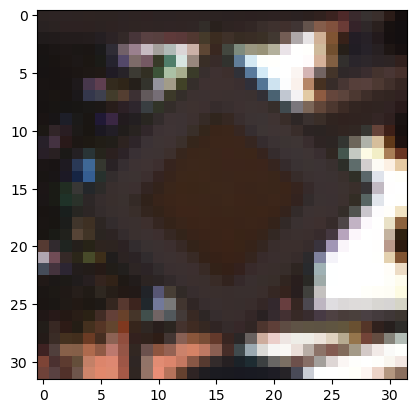

In [8]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

In [ ]:
#This code segment is responsible for creating a grid layout to display
#multiple images along with their corresponding labels.


#This code generates a grid of subplots to display images from the training dataset (X_train). It defines the dimensions of the grid as 10 rows (L_grid) and 10 columns (W_grid). Then, it iterates through the subplots and selects random images from the training dataset to display. The title of each subplot corresponds to the label (y_train) of the displayed image. Finally, it adjusts the spacing between subplots for better visualization.

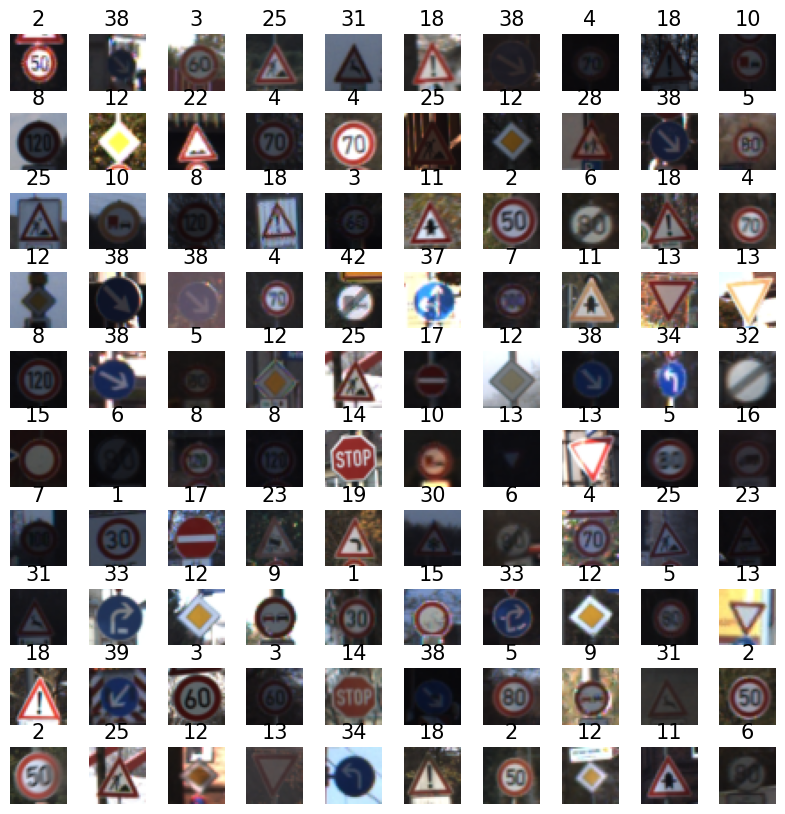

In [9]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid*L_grid):
    # Select a random number
    index=np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize=15)
    axes[i].axis("off")
    
plt.subplots_adjust(hspace=0.4)

# Converting RGB to grayscale images involves simplifying multi-color channels into a single brightness level per pixel.

In [ ]:
#This code is using the shuffle function from the sklearn.utils module, which is part of scikit-learn, a popular machine learning library in Python.

#Here's what it does:

# It imports the shuffle function from the sklearn.utils module.
# It applies the shuffle function to shuffle two datasets, X_train and y_train.
# In machine learning, it's common practice to shuffle the training data before training a model.
# This helps in avoiding any bias that might be introduced due to the order of the data.
# By shuffling the data, you ensure that the model sees a random mix of examples during each training epoch,
# which can lead to better generalization and prevent overfitting.




In [10]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
#This code segment converts the RGB images in the training, testing, and validation datasets 
# to grayscale by taking the average of the RGB channels.

#  Here's what it does:

#It divides each pixel value in the RGB images (X_train, X_test, X_validation) by 3.
#This effectively computes the average pixel value across the RGB channels, because each channel 
#contributes to the overall pixel color intensity.
#It sums these averaged pixel values along the third axis (axis=3), which corresponds to the RGB channels.
#It sets the keepdims parameter to True, which means that the resulting array will have the same number of dimensions
#as the input array, with the dimensions reduced to size 1 for the summed axis.
#The result of this operation is that each image in the dataset becomes a grayscale image, represented as a single channel 
#with  pixel values ranging from 0 to 255, where 0 represents black and 255 represents white. This grayscale conversion 
#is often used to simplify image processing tasks or to reduce computational complexity when working with color images.

In [11]:
X_train_gray=np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray=np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray=np.sum(X_validation/3, axis=3, keepdims=True)

In [ ]:
# The code X_train_gray.shape returns the shape of the X_train_gray NumPy array.
# NumPy arrays have a shape attribute that gives you the dimensions of the array. 
# For example, if X_train_gray is a 4-dimensional array, the shape would be represented as a tuple 
# (num_samples, height, width, num_channels).
# So, X_train_gray.shape would return a tuple representing the shape of the X_train_gray array,
#  which typically would give you information about the number of samples, height, width, and number of channels
# in the grayscale images. For example, if X_train_gray is a NumPy array with dimensions
# (num_samples, height, width, 1), then X_train_gray.shape would return a tuple like (num_samples, height, width, 1). 

In [12]:
X_train_gray.shape

(34799, 32, 32, 1)

In [ ]:
# This code normalizes the pixel values of the grayscale images.
# Normalization is a common preprocessing step in machine learning, particularly for neural networks,
# as it helps improve convergence and performance.

# Here's what it does:
# It subtracts 128 from each pixel value of the grayscale images (X_train_gray, X_test_gray, X_validation_gray).
# This effectively shifts the pixel values so that the mean pixel value is centered around 0.
# It then divides each pixel value by 128.
# This scales the pixel values so that they fall within a range of -1 to 1.
# The result of this normalization process is that the pixel values of the grayscale images are centered around
# 0 and have a range between -1 and 1.
# This can help in training neural networks more effectively as it prevents the input values from being too large
# which could slow down learning due to large weight updates during backpropagation.
# Additionally, it helps in ensuring that all features have similar ranges, which can help the optimization process.


In [13]:
X_train_gray_norm=(X_train_gray-128)/128
X_test_gray_norm=(X_test_gray-128)/128
X_validation_gray_norm=(X_validation_gray-128)/128

In [ ]:
# After the normalization process, X_train_gray_norm would contain the grayscale training images with
# pixel values adjusted so that they are centered around 0 and scaled to fall within the range
# of -1 to 1, as described in the normalization process.
# This normalized data is often used as input for machine learning algorithms, particularly neural networks,
# to facilitate learning and improve convergence during training.

In [14]:
X_train_gray_norm

array([[[[-0.16927083],
         [-0.07291667],
         [ 0.15625   ],
         ...,
         [-0.41927083],
         [-0.4296875 ],
         [-0.42447917]],

        [[-0.17708333],
         [-0.0703125 ],
         [ 0.09635417],
         ...,
         [-0.41927083],
         [-0.421875  ],
         [-0.41145833]],

        [[-0.15364583],
         [-0.078125  ],
         [-0.015625  ],
         ...,
         [-0.41666667],
         [-0.41145833],
         [-0.41927083]],

        ...,

        [[-0.33072917],
         [-0.31510417],
         [-0.34375   ],
         ...,
         [-0.42708333],
         [-0.42447917],
         [-0.43229167]],

        [[-0.30989583],
         [-0.30989583],
         [-0.328125  ],
         ...,
         [-0.42447917],
         [-0.43229167],
         [-0.43229167]],

        [[-0.328125  ],
         [-0.3046875 ],
         [-0.31510417],
         ...,
         [-0.43229167],
         [-0.44270833],
         [-0.44010417]]],


       [[[-0.2890625 ],


In [ ]:
# i = random.randint(1, len(X_train_gray)): This line randomly selects an index i within the range 
# of the length of X_train_gray. It seems to be choosing a random index from the grayscale training images.
# plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray'): This line uses imshow() function from matplotlib 
# to display the grayscale version of the image at index i. squeeze() is used to remove
# single-dimensional entries from the shape of the array. cmap='gray' specifies that the colormap to be used is grayscale.
# plt.figure(): This line creates a new figure. This is used to separate different plots into different figures.
# plt.imshow(X_train[i]): This line displays the original RGB image from the training set at index i.
# plt.figure(): Another new figure is created.

# plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray'): This line displays the normalized grayscale version of
# the image at index i.
 
#The purpose of this code seems to be to visually compare different versions of the same image:
# the original RGB image, its grayscale version, and its normalized grayscale version.
# This kind of visualization is often helpful during data preprocessing to ensure that the transformations
# are applied correctly and to understand how the data looks after preprocessing.


In [1]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

NameError: name 'random' is not defined

In [ ]:
# i = 610: This assigns the index 610 to the variable i.
# It seems that you want to visualize the images at this specific index from your dataset.

# plt.imshow(X_train_gray[i].squeeze(), cmap='gray'): This line displays the grayscale version of the image at index
# i from the X_train_gray dataset. squeeze() is used to remove single-dimensional entries from
# the shape of the array. cmap='gray' specifies that the colormap to be used is grayscale.


# plt.figure(): This line creates a new figure. This is used to separate different plots into different figures.
# plt.imshow(X_train[i]): This line displays the original RGB image from the training set at index i.

# The purpose of this code is to compare the grayscale version of an image with its original RGB version.
# It could be useful for inspecting the effect of converting an image to grayscale, which often removes 
# color information but retains important features for certain tasks like object detection or image classification.

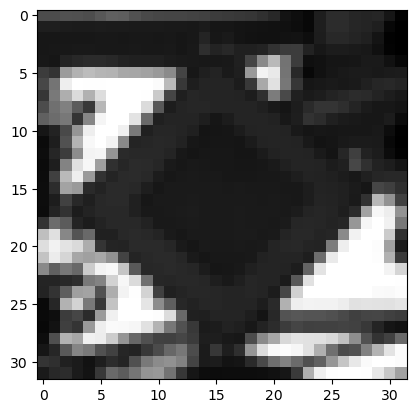

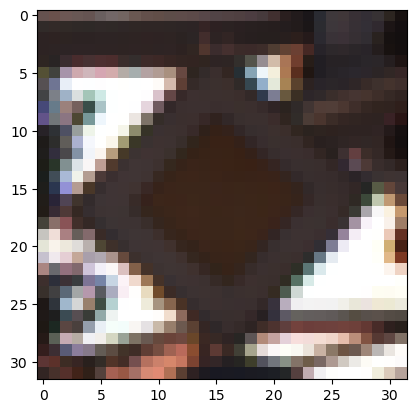

In [27]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])

# Build the Deep Learning CNN Model

In [6]:
# This code defines a Convolutional Neural Network (CNN) model using the Keras API, which is part of TensorFlow. Let's break down the code:
# from tensorflow.keras import datasets, layers, models, layers: This imports necessary modules from TensorFlow's Keras API. These modules include datasets, layers, and models needed to define and train neural networks.
# CNN=models.Sequential(): This creates a Sequential model, which is a linear stack of layers. The layers are added sequentially, and each layer has weights that correspond to the input from the previous layer.
# CNN.add(layers.Conv2D(6, (5,5), activation='relu', input_shape=(32,32,1))): This adds a 2D convolutional layer (Conv2D) to the model with 6 filters, each with a 5x5 kernel size. The activation function used is ReLU. input_shape=(32,32,1) specifies the shape of the input data, which is 32x32 grayscale images (1 channel).
# CNN.add(layers.AveragePooling2D()): This adds an average pooling layer (AveragePooling2D) to the model. Pooling layers reduce the spatial dimensions of the input data by taking the average value over a pool of neighboring pixels.
# CNN.add(layers.Dropout(0.2)): This adds a dropout layer (Dropout) to the model with a dropout rate of 0.2. Dropout is a regularization technique used to prevent overfitting by randomly setting a fraction of input units to zero during training.
# CNN.add(layers.Conv2D(16, (5,5), activation='relu')): This adds another 2D convolutional layer to the model with 16 filters and a 5x5 kernel size.
# CNN.add(layers.AveragePooling2D()): Another average pooling layer is added to the model.
# CNN.add(layers.Flatten()): This adds a flatten layer (Flatten) to the model. Flatten layers flatten the input data into a 1-dimensional array, which is required before passing it to a fully connected layer.
# CNN.add(layers.Dense(120, activation='relu')): This adds a fully connected layer (Dense) with 120 units and ReLU activation function.
# CNN.add(layers.Dense(84, activation='relu')): Another fully connected layer is added with 84 units and ReLU activation function.
# CNN.add(layers.Dense(43, activation='softmax')): This adds the output layer with 43 units (assuming it's a classification task with 43 classes) and softmax activation function. Softmax activation is commonly used in multi-class classification problems to obtain probabilities for each class.
# CNN.summary(): This prints a summary of the model, which includes the layer types, output shapes, and the number of parameters in each layer. This summary provides useful information about the architecture and size of the model.


In [16]:
from tensorflow.keras import datasets, layers, models

CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 1)))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5, 5), activation='relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation='relu'))
CNN.add(layers.Dense(84, activation='relu'))
CNN.add(layers.Dense(43, activation='softmax'))

CNN.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 dropout (Dropout)           (None, 14, 14, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0

# Train the  CNN Model

In [ ]:
#This line of code compiles the CNN model using the Adam optimizer, sparse categorical crossentropy loss function, and accuracy as the metric to monitor during training.


#optimizer='Adam': Adam is an optimization algorithm commonly used for training deep learning models. It's known for being computationally efficient and well-suited for problems with large datasets and high-dimensional parameter spaces.

#loss='sparse_categorical_crossentropy': This is the loss function used to measure the difference between the model's predictions and the actual labels during training. Sparse categorical crossentropy is commonly used for classification problems where the labels are integers (e.g., 0, 1, 2) and there are three or more classes. It computes the crossentropy loss between the true labels and the predicted probability distribution.

#metrics=['accuracy']: This specifies the evaluation metric to be used during training and testing. In this case, accuracy is chosen, which measures the proportion of correct predictions made by the model over all predictions.

#After compiling the model with these settings, it's ready to be trained using the compiled optimizer, loss function, and evaluation metric.

In [17]:
CNN.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# CNN.fit: This method starts the training process of the CNN model.
# X_train_gray_norm, y_train: These are the input grayscale images (X_train_gray_norm) and corresponding labels (y_train) used for training the model.
# batch_size=500: This parameter determines the number of samples that will be propagated through the network at once. The model will update its weights after processing each batch. Here, a batch size of 500 is specified.
# epochs=30: This parameter defines the number of complete passes through the training dataset. In this case, the model will be trained for 30 epochs.
# verbose=1: This parameter controls the verbosity of the training output. A value of 1 means that training progress will be displayed in the console for each epoch.
# validation_data=(X_validation_gray_norm, y_validation): This parameter provides validation data to evaluate the model's performance during training. Here, it uses the validation grayscale images (X_validation_gray_norm) and their corresponding labels (y_validation). The model's performance on this data will be evaluated after each epoch, allowing you to monitor whether the model is overfitting or underfitting.
#The fit method returns a history object containing information about the training process, such as the loss and accuracy values at each epoch. This history object can be used to visualize the training progress and evaluate the model's performance.

In [18]:
history=CNN.fit(X_train_gray_norm, y_train, batch_size=500, epochs=30, verbose=1,
                validation_data=(X_validation_gray_norm, y_validation))

Epoch 1/30
70/70 [==============================] - 3s 37ms/step - loss: 3.2448 - accuracy: 0.1564 - val_loss: 2.8028 - val_accuracy: 0.2653
Epoch 2/30
70/70 [==============================] - 2s 35ms/step - loss: 1.9998 - accuracy: 0.4449 - val_loss: 1.6374 - val_accuracy: 0.5268
Epoch 3/30
70/70 [==============================] - 2s 35ms/step - loss: 1.2564 - accuracy: 0.6304 - val_loss: 1.1010 - val_accuracy: 0.6787
Epoch 4/30
70/70 [==============================] - 2s 36ms/step - loss: 0.8945 - accuracy: 0.7375 - val_loss: 0.9077 - val_accuracy: 0.7349
Epoch 5/30
70/70 [==============================] - 3s 36ms/step - loss: 0.7016 - accuracy: 0.7939 - val_loss: 0.7228 - val_accuracy: 0.7825
Epoch 6/30
70/70 [==============================] - 3s 37ms/step - loss: 0.5801 - accuracy: 0.8313 - val_loss: 0.6026 - val_accuracy: 0.8193
Epoch 7/30
70/70 [==============================] - 3s 36ms/step - loss: 0.4790 - accuracy: 0.8626 - val_loss: 0.5694 - val_accuracy: 0.8252
Epoch 8/30
70

# Evaluate model's performance with Confusion Matrix for accuracy assessment.

In [ ]:
#This code evaluates the trained CNN model (CNN) using the test data (X_test_gray_norm and y_test) and prints the test accuracy.

In [19]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 2ms/step - loss: 0.6068 - accuracy: 0.8986
Test Accuracy: 0.8985748291015625


In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
#This code extracts the training and validation accuracy values (accuracy and val_accuracy, respectively) along with the training and validation loss values (loss and val_loss, respectively) from the training history of a neural network model. These values are typically stored in a dictionary-like object called history returned by the fit function when training a Keras model.

In [21]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
#This code plots the training and validation loss over epochs. The x-axis represents the epochs (training iterations), and the y-axis represents the corresponding loss values. The training loss is plotted with red circles ('ro') and labeled as 'Training Loss', while the validation loss is plotted with red lines ('r') and labeled as 'Validation Loss'. The title of the plot is set to 'Training and Validation loss'.

Text(0.5, 1.0, 'Training and Validation loss')

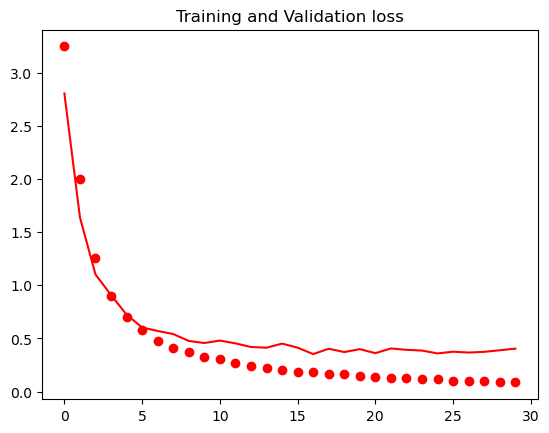

In [22]:
epochs=range(len(accuracy))
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation loss')

In [ ]:
#This code plots the training and validation accuracy over epochs. 

Text(0.5, 1.0, 'Training and Validation Accuracy')

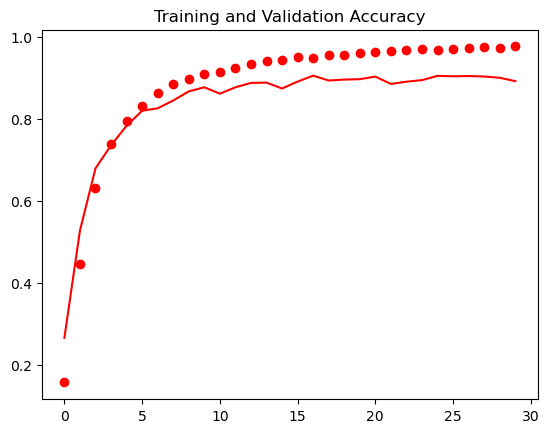

In [23]:
 

epochs = range(1, len(accuracy) + 1)  
plt.plot(epochs, accuracy, 'ro', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')  
plt.ylabel('Accuracy')  
plt.legend()  
plt.show()


In [ ]:
#This code generates predictions using the trained CNN model (CNN) on the normalized grayscale test data (X_test_gray_norm). Then, it computes the confusion matrix between the true labels (y_true) and the predicted classes. Finally, it visualizes the confusion matrix as a heatmap using matplotlib and seaborn libraries.

395/395 [==============================] - 1s 2ms/step


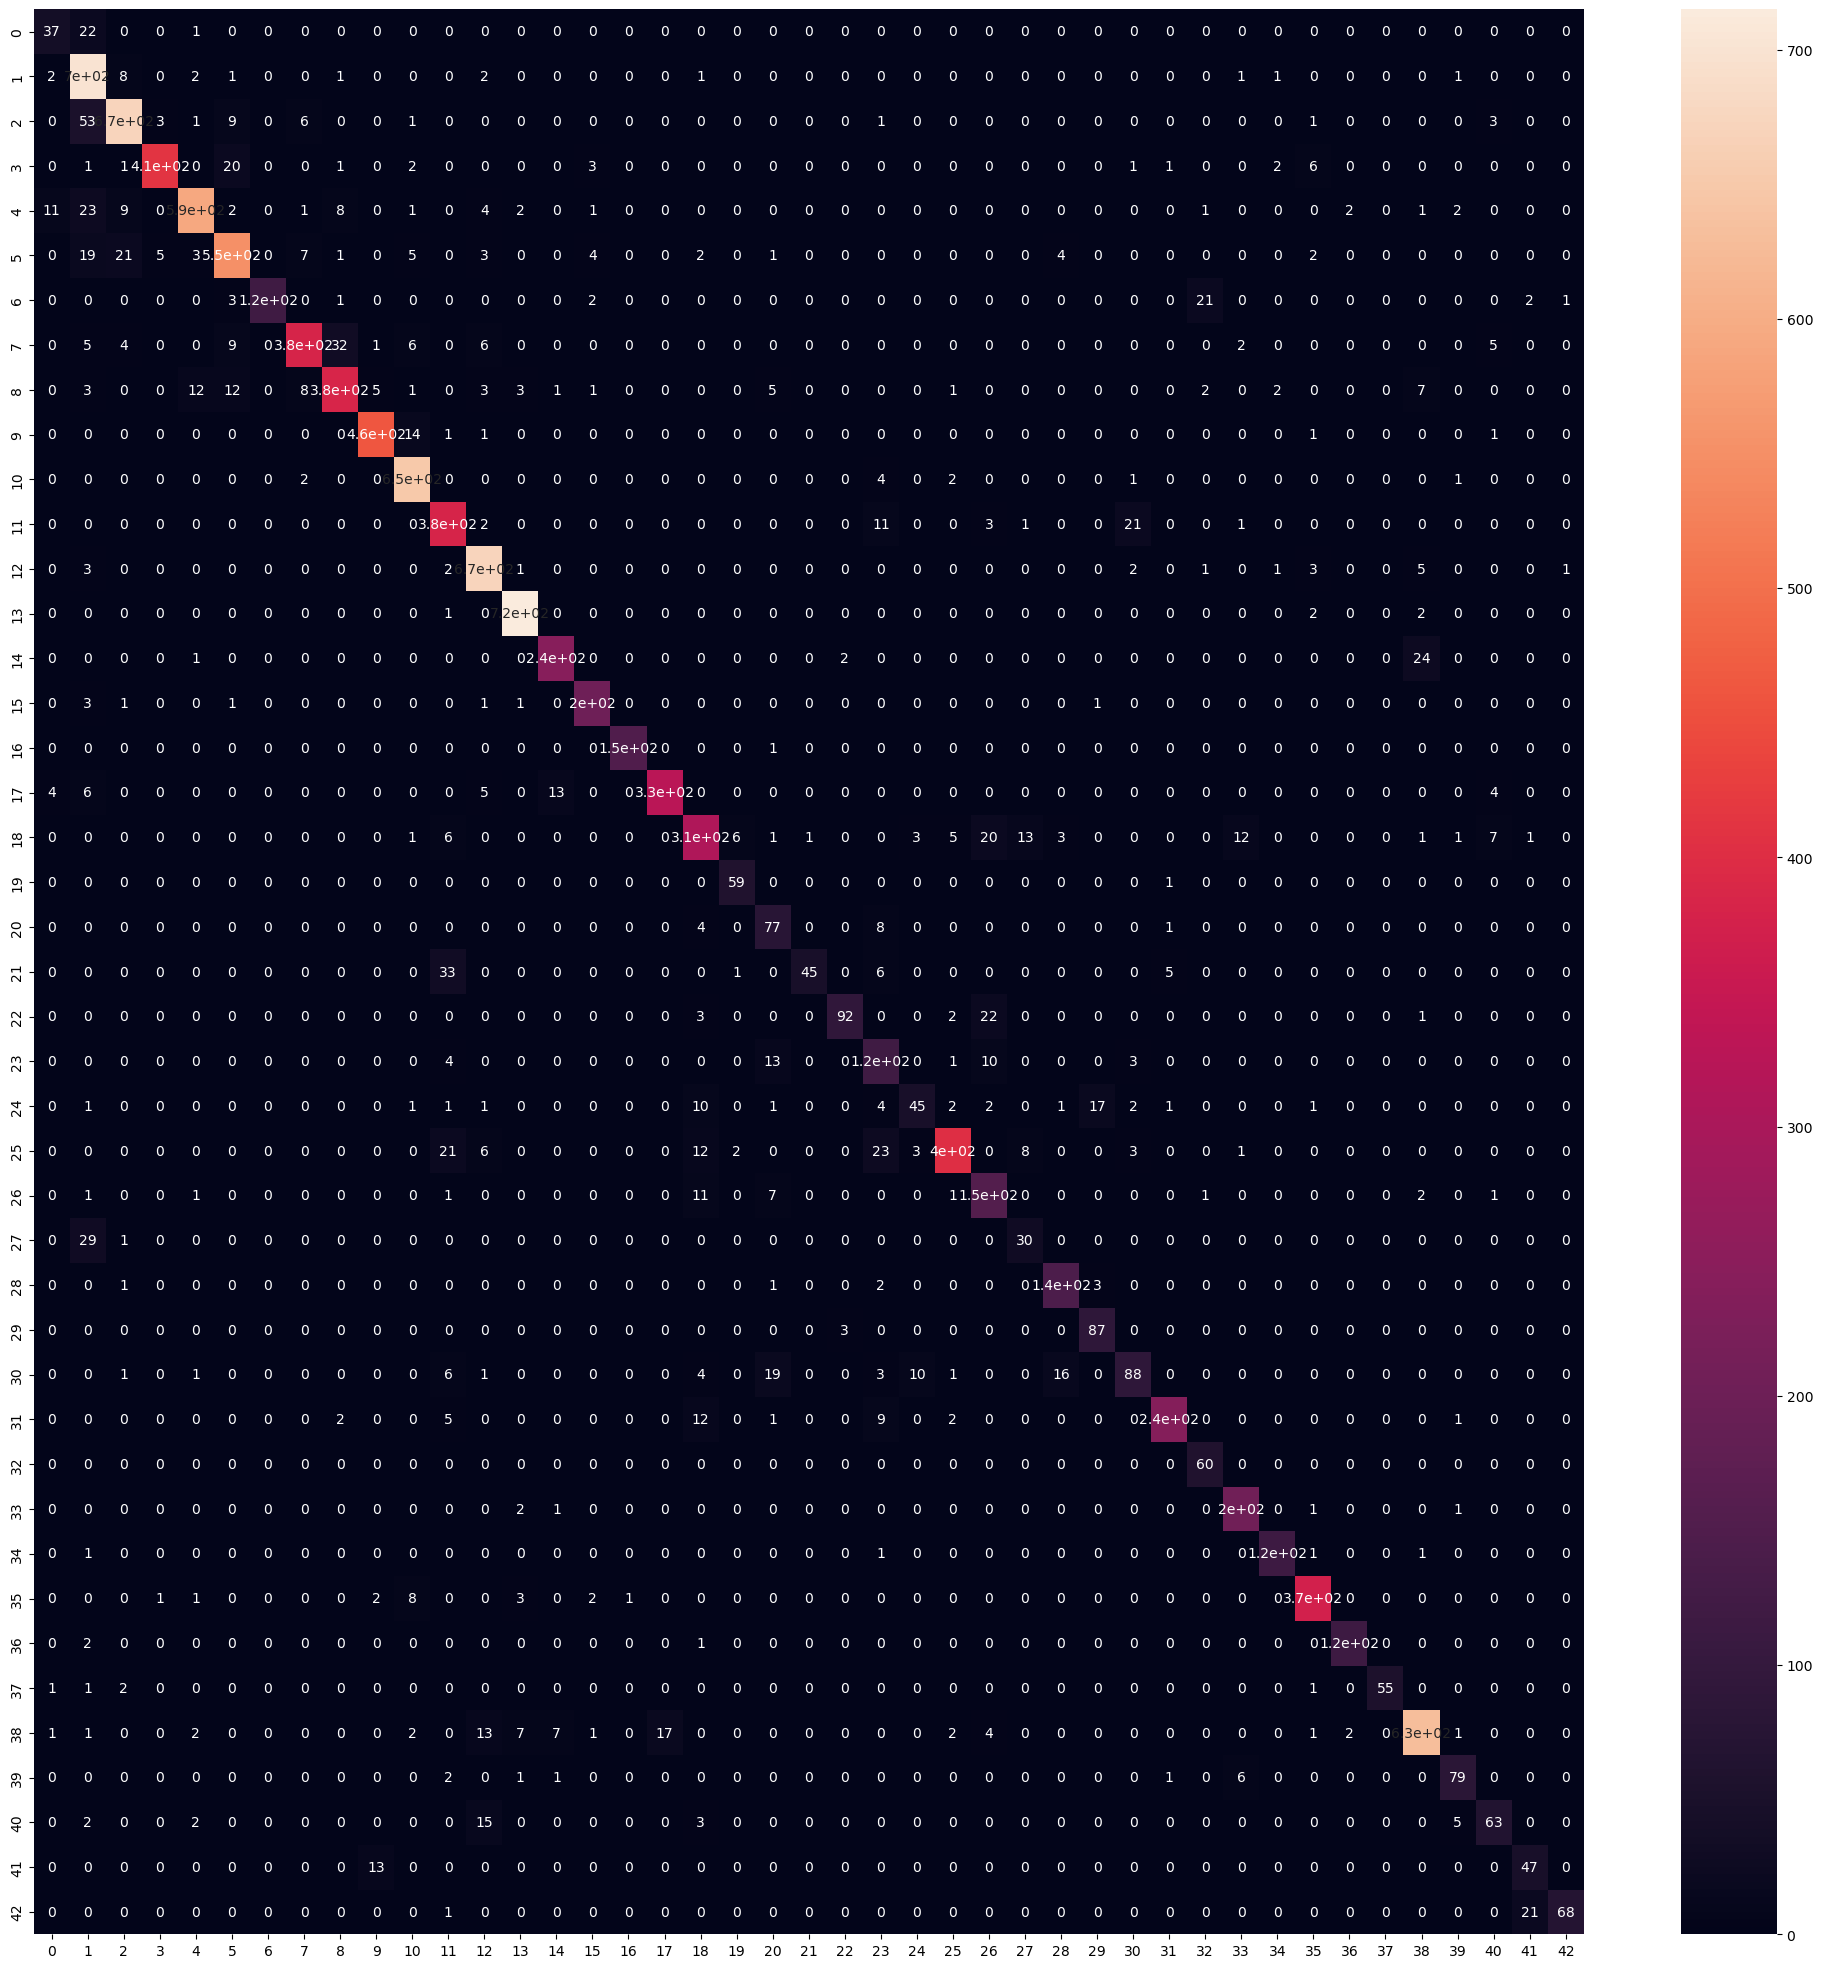

In [24]:
predicted_classes=CNN.predict(X_test_gray_norm).argmax(axis=1)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)
plt.show()

# Display a grid of images from the X_test dataset using Matplotlib

In [ ]:
#This code creates a grid of subplots to display a selection of images from the test dataset (X_test). It sets the number of rows (L) and columns (W) to 5 each, and creates a grid of subplots with these dimensions. Then, it iterates through the subplots and displays the corresponding images from the test dataset. Finally, it adjusts the spacing between subplots for better visualization.

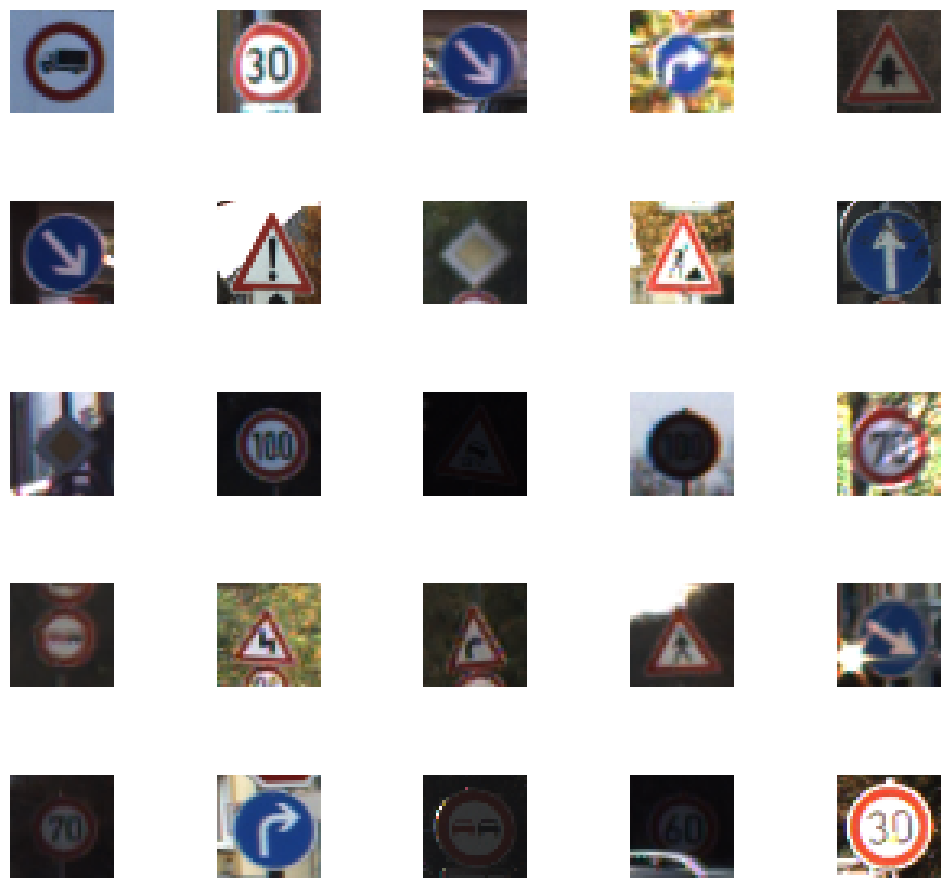

In [25]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1) 